<h1 align='center' style='color: red;'><strong>Importing Libraries</strong></h1>


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori


<h3  style='color: blue;'><strong>Loading Dataset</strong></h4>


In [103]:
data = pd.read_excel('Dataset.xlsx', header = None)

In [104]:
data.shape

(7501, 20)

<h3  style='color: pink;'><strong>Converting data values into list and removing nan values</strong></h4>


In [105]:
T = []
for i in range(len(data)):
    T.append([ str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j]) != 'nan'])

In [106]:
T

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

### **Check maximum sold item**

In [107]:
D = data.values.ravel()

In [108]:
import collections
val = collections.Counter(D)
val

Counter({nan: 120657,
         'mineral water': 1788,
         'eggs': 1348,
         'spaghetti': 1306,
         'french fries': 1282,
         'chocolate': 1230,
         'green tea': 991,
         'milk': 972,
         'ground beef': 737,
         'frozen vegetables': 715,
         'pancakes': 713,
         'burgers': 654,
         'cake': 608,
         'cookies': 603,
         'escalope': 595,
         'low fat yogurt': 574,
         'shrimp': 536,
         'tomatoes': 513,
         'olive oil': 494,
         'frozen smoothie': 475,
         'turkey': 469,
         'chicken': 450,
         'whole wheat rice': 439,
         'grated cheese': 393,
         'cooking oil': 383,
         'soup': 379,
         'herb & pepper': 371,
         'honey': 356,
         'champagne': 351,
         'fresh bread': 323,
         'salmon': 319,
         'brownies': 253,
         'avocado': 250,
         'hot dogs': 243,
         'cottage cheese': 239,
         'tomato juice': 228,
         'butter': 

In [109]:
# it is in list of tuples
val.items()

dict_items([('shrimp', 536), ('almonds', 153), ('avocado', 250), ('vegetables mix', 193), ('green grapes', 68), ('whole weat flour', 70), ('yams', 86), ('cottage cheese', 239), ('energy drink', 200), ('tomato juice', 228), ('low fat yogurt', 574), ('green tea', 991), ('honey', 356), ('salad', 37), ('mineral water', 1788), ('salmon', 319), ('antioxydant juice', 67), ('frozen smoothie', 475), ('spinach', 53), ('olive oil', 494), ('burgers', 654), ('meatballs', 157), ('eggs', 1348), (nan, 120657), ('chutney', 31), ('turkey', 469), ('milk', 972), ('energy bar', 203), ('whole wheat rice', 439), ('whole wheat pasta', 221), ('french fries', 1282), ('soup', 379), ('light cream', 117), ('shallot', 58), ('frozen vegetables', 715), ('spaghetti', 1306), ('pet food', 49), ('cookies', 603), ('cooking oil', 383), ('champagne', 351), ('chocolate', 1230), ('chicken', 450), ('oil', 173), ('fresh tuna', 167), ('tomatoes', 513), ('black tea', 107), ('extra dark chocolate', 90), ('protein bar', 139), ('red

### **Converting into DataFrame**

In [110]:
df = pd.DataFrame(val.items())

### **Renaming the Columnn**

In [111]:
df = df.rename(columns={0:'items',1:'Total'})

### **Sorting in the Descending Order**
+ removing nan values

In [112]:
df.sort_values(by='Total',ascending=False)[1:]

,items,Total
14,mineral water,1788
22,eggs,1348
35,spaghetti,1306
30,french fries,1282
40,chocolate,1230
...,...,...
88,tea,29
115,bramble,14
118,cream,7
119,napkins,5


In [113]:
top5 = df.sort_values(by='Total',ascending=False)[1:6]

In [114]:
top5

,items,Total
14,mineral water,1788
22,eggs,1348
35,spaghetti,1306
30,french fries,1282
40,chocolate,1230


### **Top 5 maximum items sold Visualization**

<BarContainer object of 5 artists>

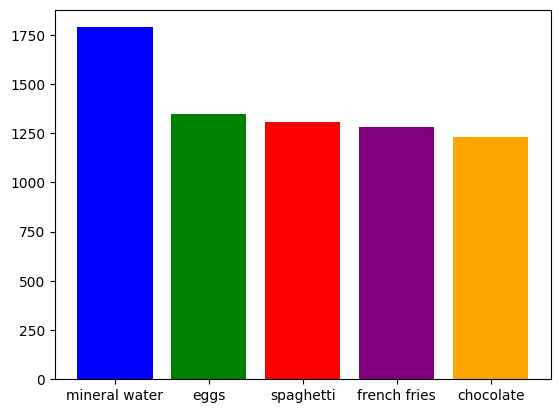

In [121]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(x=top5['items'],height=top5['Total'],color=colors)

<h1 align='center' style='color: red;'><strong>Applying Apriori</strong></h1>


In [116]:
rules = apriori(T,min_support=0.003,min_confidence=0.35,min_lift=3,min_lenght=2)

### **Converting into list**

In [117]:
rules = list(rules)

#### **Finding how many relation derived**

In [118]:
print("There are {} Relation derived.".format(len(rules)))

There are 41 Relation derived.


In [119]:

for item in rules:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: spaghetti -> milk
Support: 0.003332888948140248
Confidence: 0.41666666666666663
Lift: 3.215449245541838
Rule: cake -> tomatoes
Support: 0.0030662578322890282
Confidence: 0.36507936507936506
Lift: 3.8300144300144296
Rule: spaghetti -> cereals
Support: 0.0030662578322890282
Confidence: 0.6764705882352942
Lift: 3.8853031258445188
Rule: chicken -> milk
Support: 0.0038661511798426876
Confidence: 0.40845070422535207
Lift: 3.152046020981858
Rule: chicken -> milk
Support: 0.0035995200639914677
Confidence: 0.5
Lift: 3.858539094650206
Rule: ground beef -> chocolate
Support: 0.003999466737768298
Confidence: 0.4411764705882354
Lift: 4.4901827759597746
Rule: soup -> milk
Support: 0.003999466737768298
Confidence: 0.3947368421052632
Lift: 3.0462150747238472
Rule: cooking

By using above generated rules we got the value of Support, Confidence and Lift for genrated rules.

Supprot : This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

Confidence : This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Lift : This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.


From above generated output we can filter out some insights such as:

1) There are 37% of transactions containing escalope also contain pasta .

2) There are 37% of transactions containing ground beef also contain tomato sauce.

3) There are 41% of transactions containing spaghetti also contains milk.


---

